In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [43]:
# Load the dataset
data = pd.read_csv('sharktank.csv')  
print(data.columns)

Index(['Season Number', 'Startup Name', 'Episode Number', 'Pitch Number',
       'Season Start', 'Season End', 'Original Air Date', 'Episode Title',
       'Anchor', 'Industry', 'Business Description', 'Company Website',
       'Started in', 'Number of Presenters', 'Male Presenters',
       'Female Presenters', 'Transgender Presenters', 'Couple Presenters',
       'Pitchers Average Age', 'Pitchers City', 'Pitchers State',
       'Yearly Revenue', 'Monthly Sales', 'Gross Margin', 'Net Margin',
       'EBITDA', 'Cash Burn', 'SKUs', 'Has Patents', 'Bootstrapped',
       'Original Ask Amount', 'Original Offered Equity', 'Valuation Requested',
       'Received Offer', 'Accepted Offer', 'Total Deal Amount',
       'Total Deal Equity', 'Total Deal Debt', 'Debt Interest',
       'Deal Valuation', 'Number of Sharks in Deal', 'Deal Has Conditions',
       'Royalty Deal', 'Advisory Shares Equity', 'Namita Investment Amount',
       'Namita Investment Equity', 'Namita Debt Amount',
       'Vineeta

In [44]:
# Select relevant columns for recommendations
columns = [
    'Industry', 'Business Description', 'Yearly Revenue', 'Number of Sharks in Deal'
]
df = data[columns].copy()  # Create a copy to avoid SettingWithCopyWarning

# Handle missing values without using inplace
df['Business Description'] = df['Business Description'].fillna('')  # For text data
df['Yearly Revenue'] = df['Yearly Revenue'].fillna(0)  # For numerical data
df['Number of Sharks in Deal'] = df['Number of Sharks in Deal'].fillna(0)  # For numerical data

# Ensure numerical columns are of type float
df['Yearly Revenue'] = pd.to_numeric(df['Yearly Revenue'], errors='coerce')
df['Number of Sharks in Deal'] = pd.to_numeric(df['Number of Sharks in Deal'], errors='coerce')

# Encode textual data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
business_description_vectors = vectorizer.fit_transform(df['Business Description']).toarray()

# Normalize numerical data
scaler = MinMaxScaler()
numerical_columns = ['Yearly Revenue', 'Number of Sharks in Deal']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Combine features into a single representation
combined_features = pd.DataFrame(business_description_vectors)
combined_features[numerical_columns] = df[numerical_columns].values

# Create similarity matrix
similarity_matrix = cosine_similarity(combined_features)

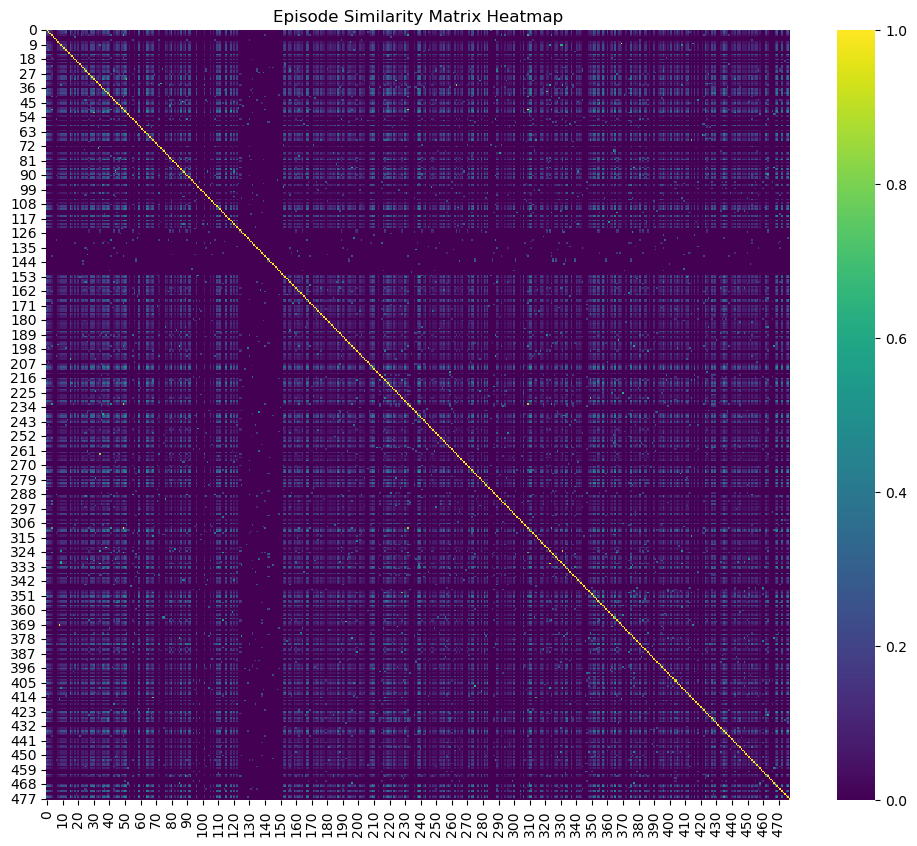

In [45]:
# Visualization: Heatmap of the similarity matrix
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_matrix, cmap='viridis', annot=False, cbar=True)
plt.title('Episode Similarity Matrix Heatmap')
plt.show()

C:\Users\Jamal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


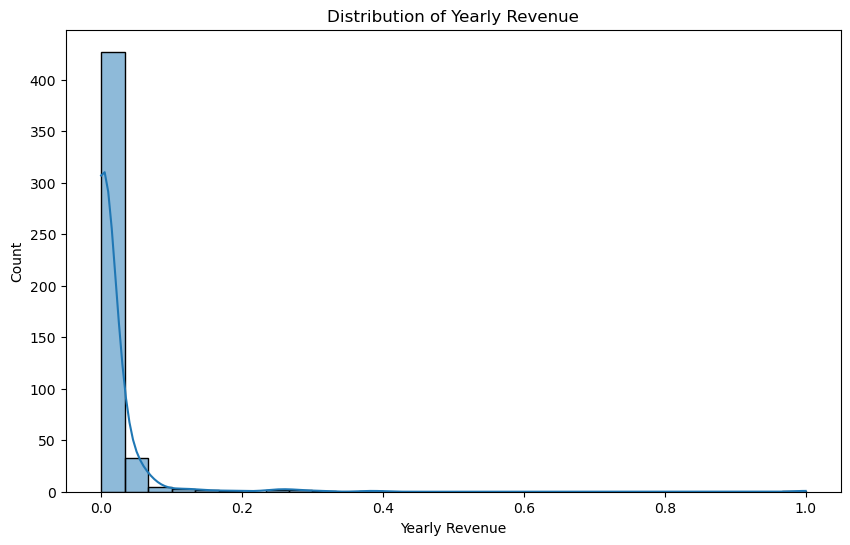

In [46]:
# Visualization: Distribution of Yearly Revenue
plt.figure(figsize=(10, 6))
sns.histplot(df['Yearly Revenue'], bins=30, kde=True)
plt.title('Distribution of Yearly Revenue')
plt.xlabel('Yearly Revenue')
plt.show()

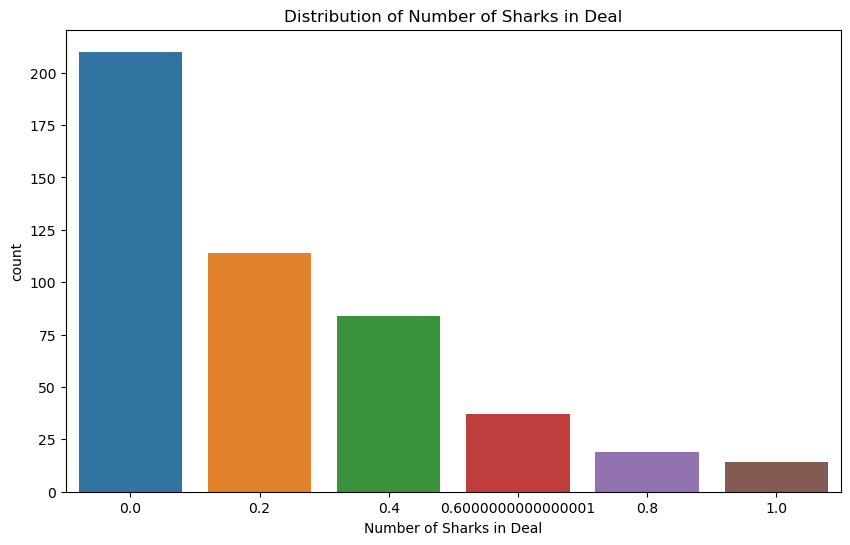

In [47]:
# Visualization: Number of Sharks in Deal distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Number of Sharks in Deal', data=df)
plt.title('Distribution of Number of Sharks in Deal')
plt.xlabel('Number of Sharks in Deal')
plt.show()

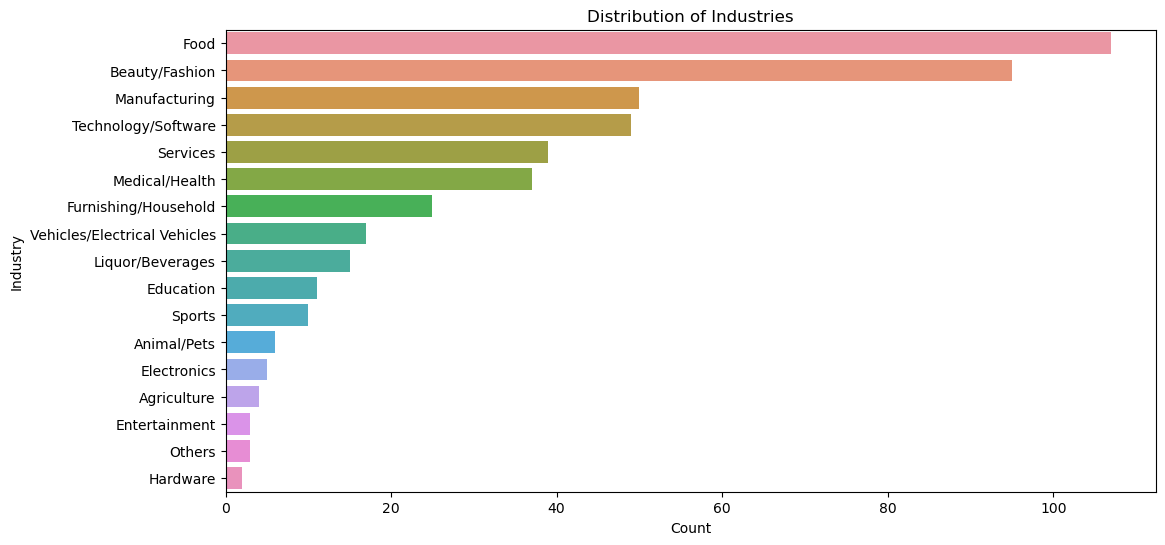

In [48]:
# Visualization: Industry distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='Industry', data=df, order=df['Industry'].value_counts().index)
plt.title('Distribution of Industries')
plt.xlabel('Count')
plt.ylabel('Industry')
plt.show()

In [49]:
# Recommendation function
def recommend_episodes(episode_index, top_n=5):
    similarities = list(enumerate(similarity_matrix[episode_index]))
    sorted_similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
    recommendations = [i[0] for i in sorted_similarities[1:top_n+1]]  # Skip the first (self)
    return data.iloc[recommendations]

# Test the recommendation system
selected_episode_index = 222  # Replace with your desired episode index
recommendations = recommend_episodes(selected_episode_index, top_n=15)
print(recommendations[['Season Number', 'Episode Number', 'Startup Name', 'Industry']])


     Season Number  Episode Number       Startup Name             Industry
254              2              33           Freakins       Beauty/Fashion
380              3              20       CannazoIndia       Beauty/Fashion
60               1              19          KetoIndia                 Food
357              3              13           JewelBox       Beauty/Fashion
385              3              22              Refit          Electronics
119              1              36        FrenchCrown       Beauty/Fashion
417              3              33         BaccaBucci       Beauty/Fashion
261              2              35           Toyshine        Manufacturing
306              2              48             Rubans       Beauty/Fashion
365              3              15        NasherMiles       Beauty/Fashion
375              3              19           YesMadam       Beauty/Fashion
339              3               7              Zorko                 Food
423              3       

This is SVD based model

In [50]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('sharktank.csv')

# Select relevant columns for recommendations
columns = [
    'Industry', 'Business Description', 'Yearly Revenue', 'Number of Sharks in Deal'
]
df = data[columns].copy()  # Create a copy to avoid SettingWithCopyWarning

# Handle missing values without using inplace
df['Business Description'] = df['Business Description'].fillna('')  # For text data
df['Yearly Revenue'] = df['Yearly Revenue'].fillna(0)  # For numerical data
df['Number of Sharks in Deal'] = df['Number of Sharks in Deal'].fillna(0)  # For numerical data

# Ensure numerical columns are of type float
df['Yearly Revenue'] = pd.to_numeric(df['Yearly Revenue'], errors='coerce')
df['Number of Sharks in Deal'] = pd.to_numeric(df['Number of Sharks in Deal'], errors='coerce')

# Encode textual data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
business_description_vectors = vectorizer.fit_transform(df['Business Description']).toarray()

# Normalize numerical data
scaler = MinMaxScaler()
numerical_columns = ['Yearly Revenue', 'Number of Sharks in Deal']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Combine features into a single representation
combined_features = pd.DataFrame(business_description_vectors)
combined_features[numerical_columns] = df[numerical_columns].values

# Ensure column names are strings to avoid issues with SVD
combined_features.columns = combined_features.columns.astype(str)

# Apply Singular Value Decomposition (SVD)
svd = TruncatedSVD(n_components=50, random_state=42)  # You can adjust the number of components as needed
svd_features = svd.fit_transform(combined_features)

# Create similarity matrix using SVD features
similarity_matrix = cosine_similarity(svd_features)

# Recommendation function
def recommend_episodes(episode_index, top_n=5):
    similarities = list(enumerate(similarity_matrix[episode_index]))
    sorted_similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
    recommendations = [i[0] for i in sorted_similarities[1:top_n+1]]  # Skip the first (self)
    return data.iloc[recommendations]

# Test the recommendation system
selected_episode_index = 222  # Replace with your desired episode index
recommendations = recommend_episodes(selected_episode_index, top_n=15)
print(recommendations[['Season Number', 'Episode Number', 'Startup Name', 'Industry']])



     Season Number  Episode Number  Startup Name                      Industry
380              3              20  CannazoIndia                Beauty/Fashion
60               1              19     KetoIndia                          Food
225              2              24   LeafyAffair                Beauty/Fashion
370              3              17    Quirksmith                Beauty/Fashion
5                1               2   Agritourism                   Agriculture
123              1               0        Kineer                          Food
461              3              47   FUTRStudios           Technology/Software
205              2              18      Sayonara                Beauty/Fashion
363              3              15  ALittleExtra                Beauty/Fashion
443              3              41     MaplePods                      Services
266              2              37      Hornback  Vehicles/Electrical Vehicles
13               1               5    HungryHead    